In [ ]:
# Notebook 6: Seguimiento de objetos mediante color
# Importaos las librería necesarisas

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# Cargar una imagen de ejemplo
from urllib.request import urlopen # Para abrir URLs

# Url de una imagen con objetos coloridos
url = 'https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg'
resp = urlopen(url)
# Convertimos los bytes a un array de numpy
image = np.asarray(bytearray(resp.read()), dtype="uint8")
# Decodificamos el array como una imagen usando OpenCV
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
# OpenCV carga la imagenes en formato BGR

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [ ]:
# 1. Convertir la imagen a espacio de color HSV
# HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [ ]:
# 2. Definir rangos de color para rastrear
# Rango bajo de rojo
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

# Rango alto de rojo
lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

In [ ]:
# 3. Crear máscaras para los rangos de calor
# Aplicamos la primera máscara pára el rango bajo de rojo
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
# Aplicamos la segunda máscara para el rango alto de rojo
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
# Combinamos las máscaras para detectar todo el rango de rojo
red_mask = cv2.bitwise_or(mask1, mask2)

In [ ]:
# 4. Aplicar la máscara a la imagen original
# El resultado mostrará solo las regiones rojas de la imagen
red_detected = cv2.bitwise_and(image, image, mask=red_mask)


In [ ]:
# 5. Ahora detectemos objetos azules
# Definimos el rango de color azul en HSV
lower_blue = np.array([100, 150, 50])
upper_blue = np.array([140, 255, 255])

# Creamos la máscara para el rango azul
blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

#Aplicamos la máscara a la imagen original
blue_detected = cv2.bitwise_and(image, image, mask=blue_mask)

In [ ]:
# 6. Detectemos objetos verdes
# Definimos el rango de color  verde emn HSV
lower_green = np.array([40, 100, 50])
upper_green = np.array([80, 255, 255])

# Creamos la máscara para el rango verde
green_mask = cv2.inRange(hsv, lower_green, upper_green)

# Aplicamos la máscara a la imagen original
green_detected = cv2.bitwise_and(image, image, mask=green_mask)

In [ ]:
# 7. Encontrar contornos en la máscara roja para marcar los objetos +
# La función findContours requiere una imagen binaria
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Creamos una copia de la imagen original para dibujar los contornos
contour_image = image_rgb.copy()

# Dibujamos los contornos en la imagen
cv2.drawContours(contour_image, contours, -1, (0, 0, 255), 2)
# para cada contorno grande, dibujamos un rectángulo y el centro
for contour in contours:
  # Solo procesamos contornnos con área suficiente
  area = cv2.contourArea(contour)
  if area > 500:
    # Obtenemos el rectangulo que encierra el contornon
    x, y, w, h = cv2.boundingRect(contour)

    cv2.rectangle(contour_image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    M = cv2.moments(contour)
    if M["m00"] != 0:
      cX = int(M["m10"] / M["m00"])
      cY = int(M["m01"] / M["m00"])

      cv2.circle(contour_image, (cX, cY), 5, (0, 0, 255), -1)
      cv2.putText(contour_image, "Centro", (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

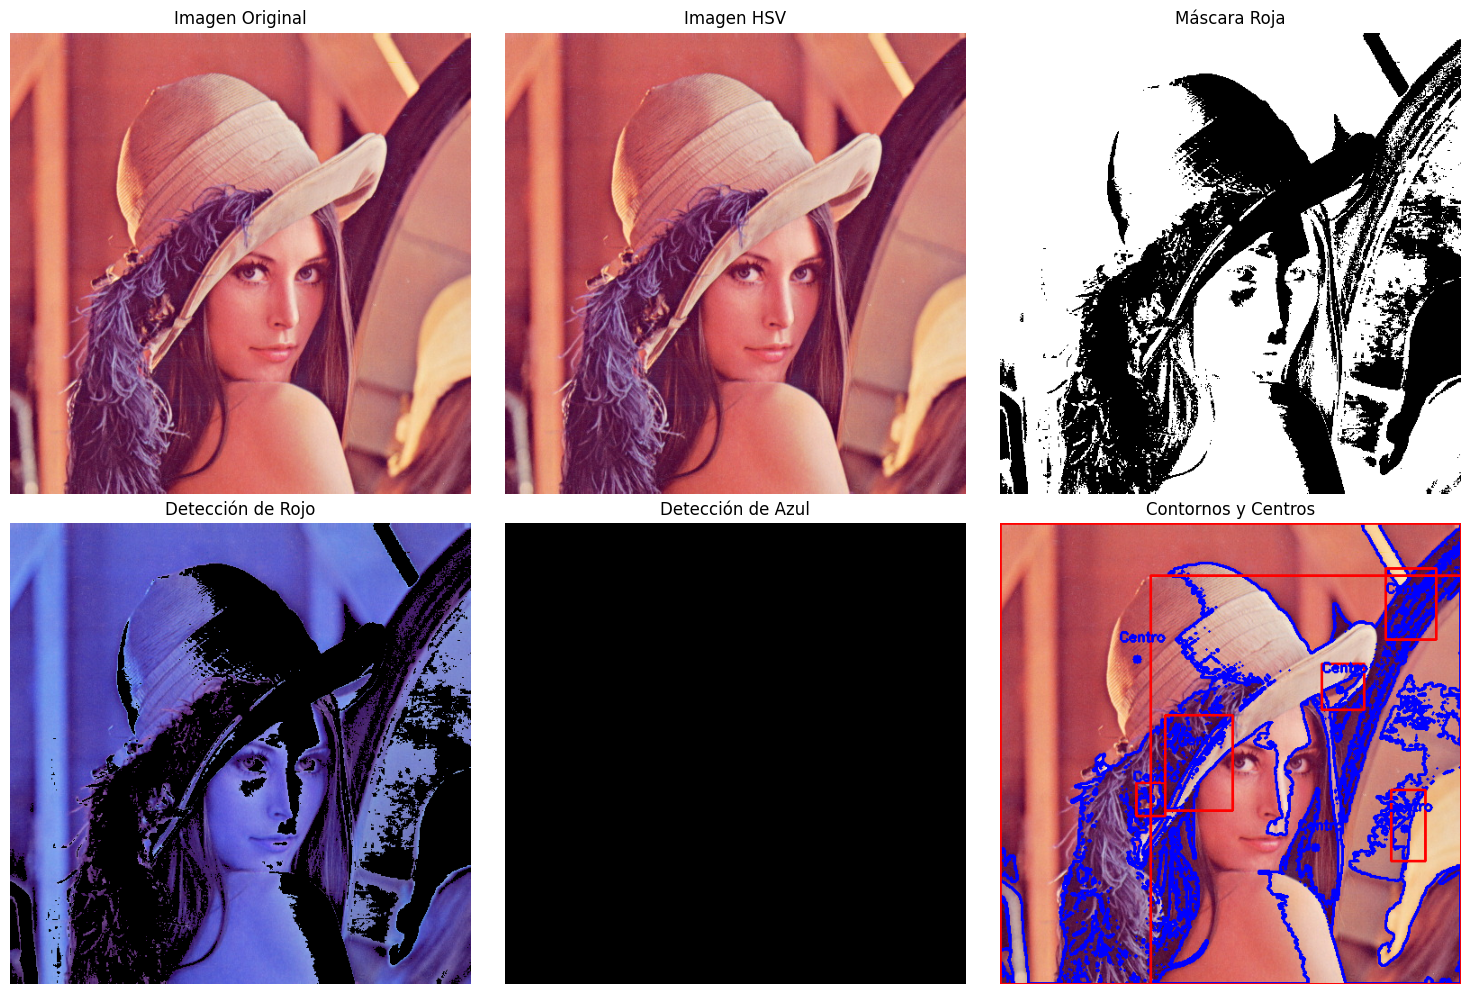

In [ ]:
# 8. Visualización de los resultados
plt.figure(figsize=(15, 10))

#Imagen Original
plt.subplot(2, 3, 1)
plt.title('Imagen Original')
plt.imshow(image_rgb)
plt.axis('off')

# Imagen HSV
plt.subplot(2, 3, 2)
plt.title('Imagen HSV')
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))
plt.axis('off')

# Máscara roja
plt.subplot(2, 3, 3)
plt.title('Máscara Roja')
plt.imshow(red_mask, cmap='gray')
plt.axis('off')

# Detección de rojo
plt.subplot(2, 3, 4)
plt.title('Detección de Rojo')
plt.imshow(red_detected)
plt.axis('off')

# Detección de azul
plt.subplot(2, 3, 5)
plt.title('Detección de Azul')
plt.imshow(blue_detected)
plt.axis('off')

# Contornos y centros
plt.subplot(2, 3, 6)
plt.title('Contornos y Centros')
plt.imshow(contour_image)
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 9. Información sobre la segmentación por color
print("Segmentación por color:")
print("1. HSV separa el color del brillo y saturación")
print("2. En OpenCV, el rango H va de 0-180 ")
print("3. Rangos típicos en HSV: ")
print("  - Rojo: [0-10] y [160-180]")
print("  - Verde: [40-80]")
print("  - Azul: [100-140]")
print(f"4. Se encontraron {len(contours)} contornos en la máscara roja")
print("5. Esta técnica es útil para seguimiento de objetos en video")

Segmentación por color:
1. HSV separa el color del brillo y saturación
2. En OpenCV, el rango H va de 0-180 
3. Rangos típicos en HSV: 
  - Rojo: [0-10] y [160-180]
  - Verde: [40-80]
  - Azul: [100-140]
4. Se encontraron 765 contornos en la máscara roja
5. Esta técnica es útil para seguimiento de objetos en video
